# Time Series Analysis

* Fast fourier transform to filter signal
* Hodrick-Prescott Filter to obtain trend and cycle of a time series 
* Fit a polynomial curve

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import scipy.spatial
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib notebook

In [2]:
# Data from http://ecg.mit.edu/time-series
data = pd.read_csv('datasets/heart-rate-time-series.csv', names=['heartrate'])

<IPython.core.display.Javascript object>


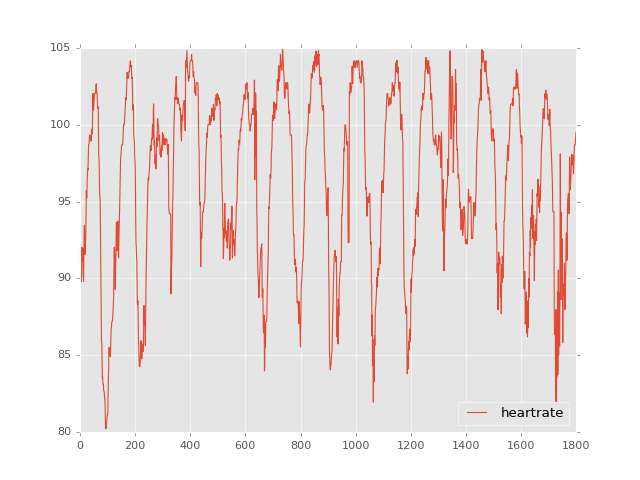

In [3]:
data.plot()

In [4]:
N = len(data)
fourier = np.fft.fft(data.values.flatten())

# frequency (Hz) = abs(fft_freq * frame_rate).
frame_rate = N / (60 * 15) # In seconds over 15 mins
freq = np.fft.fftfreq(N) 
hertz_freq = abs(freq * frame_rate)
print(N, hertz_freq, frame_rate)

1800 [ 0.          0.00111111  0.00222222 ...,  0.00333333  0.00222222
  0.00111111] 2.0


In [5]:
# Frequencies in real and complex mirror so we take just the positives
freq_ind = np.arange(1, N/2, dtype=int)

#calculate power spectual density
psd = abs(fourier[freq_ind]**2)

<IPython.core.display.Javascript object>


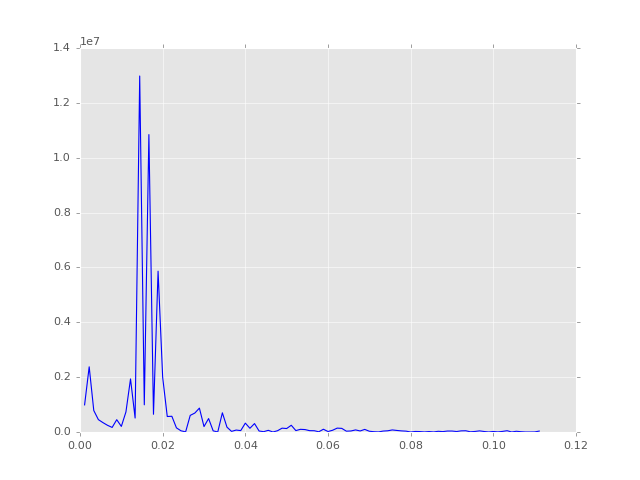

Occurs mostly around frequencies (cycles per min): [ 0.00222222  0.01444444  0.01666667  0.01888889]
[ 2 13 15 17] cycles in the entire 15 mins


In [16]:
max_samples = 100
plt.figure()
plt.plot(hertz_freq[freq_ind][:max_samples], psd[:max_samples], 'b-')
plt.show()

ind = np.where(psd > 0.2e7)[0]
print('Occurs mostly around frequencies (cycles per min):', hertz_freq[freq_ind[ind]])
print('{0} cycles in the entire 15 mins'.format(ind + 1))

In [17]:
series = np.zeros_like(fourier)
series[freq_ind[ind]] = fourier[freq_ind[ind]]
series[-freq_ind[ind]] = fourier[-freq_ind[ind]]
series = np.fft.ifft(series)
series

array([-0.95669602 -3.03164901e-15j, -0.74588669 -3.78956126e-15j,
       -0.53733555 -3.03164901e-15j, ..., -1.59929071 -7.12619262e-15j,
       -1.38374196 -6.68234466e-15j, -1.16942816 -6.62316988e-15j])

<IPython.core.display.Javascript object>


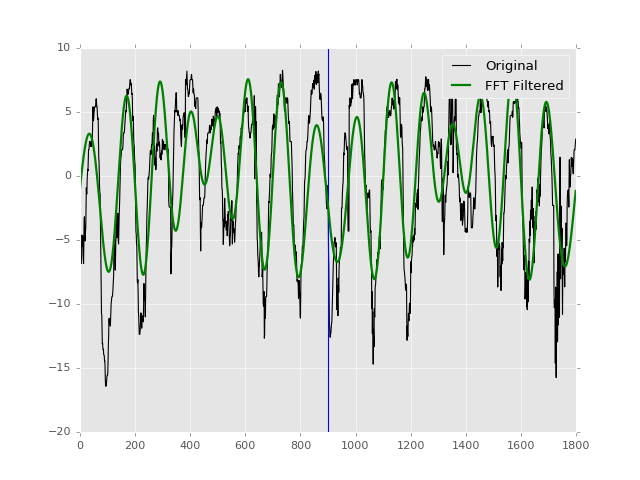

/usr/local/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [18]:
plt.figure()
plt.plot(data - data.mean(), 'k-', label='Original')
plt.axvline(N / (ind[0]+1)) # 1 Hz
plt.plot(series, 'g-', lw=2, label='FFT Filtered')
plt.legend()
plt.show()

In [19]:
hpcycle, hptrend = sm.tsa.filters.hpfilter(data.heartrate)
bkcycle = sm.tsa.filters.bkfilter(data.heartrate)
data['hpcycle'] = hpcycle
data['hptrend'] = hptrend
data['bkcycle'] = bkcycle

<IPython.core.display.Javascript object>


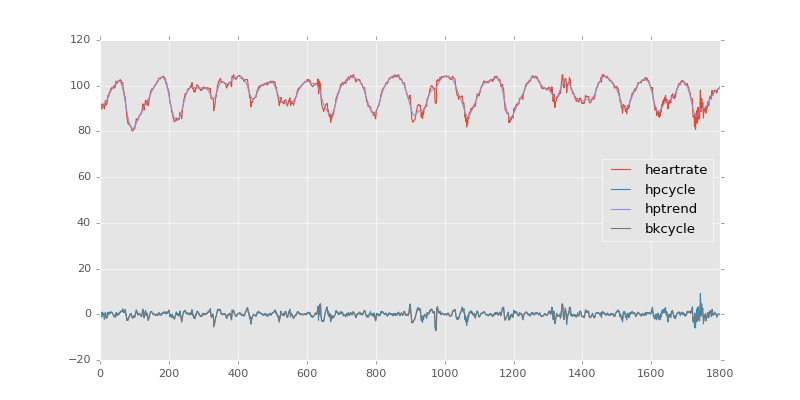

In [20]:
data.plot(figsize=(10, 5))

[  4.21287392e-15  -2.04130441e-12   4.16364213e-10  -4.64454760e-08
   3.08224484e-06  -1.24060359e-04   2.96062160e-03  -3.94295772e-02
   2.72099106e-01  -8.12146611e-01   9.18257446e+01]


<IPython.core.display.Javascript object>


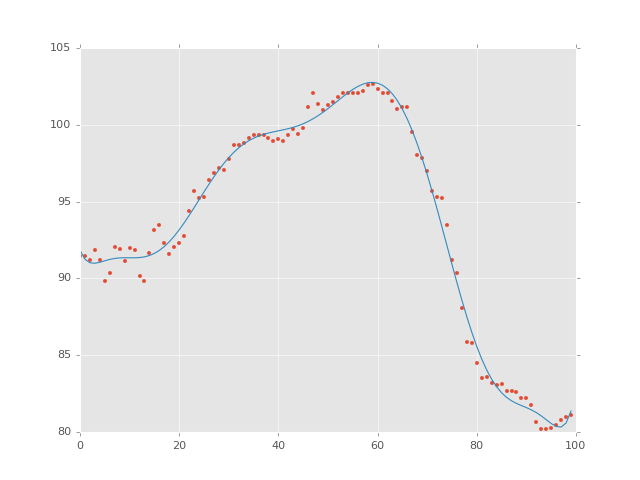

In [24]:
# Fit a polynomial curve
num_points = 100
x = np.arange(num_points)
params = np.polyfit(x, data.heartrate[:num_points], 10)
print(params)
y = np.poly1d(params)

plt.figure()
plt.plot(x, data.heartrate[:num_points], '.', x, y(x), '-')
plt.show()